In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from utils.drawing import print_classes, load_preprocess_data,plot_class_distribution

In [46]:
df = pd.read_csv('../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv')
#df.describe()

In [47]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


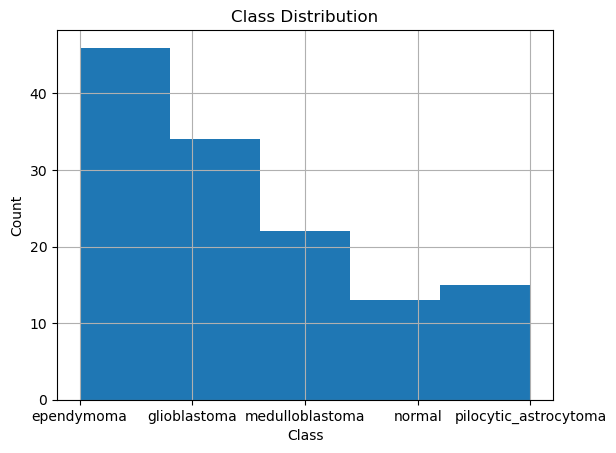

In [48]:
# Plot a histogram of the class distribution
df['type'].hist(bins=len(df['type'].unique()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [49]:
X = df.drop(['samples','type'], axis=1)
y = df['type']
X.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [50]:
pca = PCA()
scaler = StandardScaler()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=22,stratify=y)
scaler.fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [52]:
pca.fit(X_train_standard)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)
X_test_pca.shape

(39, 91)

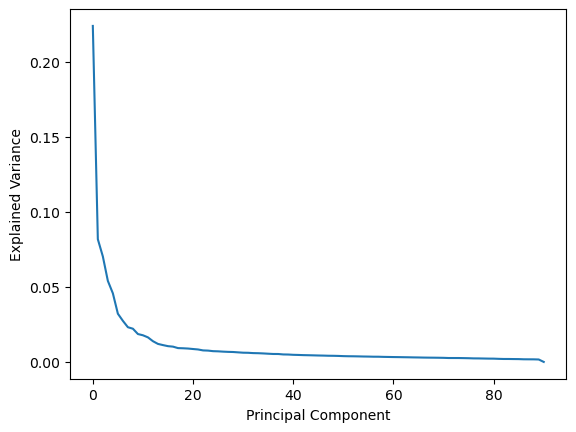

In [53]:
import numpy as np
explained_variance = pca.explained_variance_ratio_

# Print the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
#print(cumulative_variance)

# Plot the explained variance
import matplotlib.pyplot as plt
plt.plot(explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [54]:
pca.components_.shape

(91, 54675)

In [55]:
pca_names = [f'pca_{i}' for i in range(cumulative_variance.shape[0])]

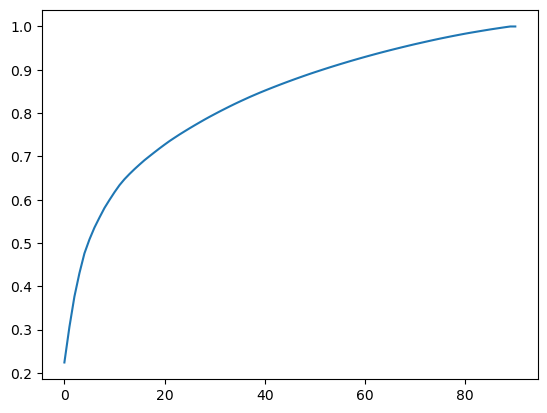

In [56]:
plt.plot(cumulative_variance)

In [57]:
cumulative_variance.shape

(91,)

In [58]:
pca.components_

array([[ 2.46816146e-03, -4.12758029e-03,  2.75399006e-04, ...,
        -4.12796512e-03, -4.42466732e-03, -1.00726070e-03],
       [-1.19500383e-02,  6.88166818e-04, -6.76819193e-03, ...,
         3.03041768e-04,  2.01208692e-03,  2.01815599e-03],
       [-5.98161003e-04, -8.29159104e-03, -1.15341277e-03, ...,
         2.99947539e-03, -1.61039846e-03,  3.05385824e-03],
       ...,
       [-5.24686350e-04, -1.46739302e-03, -5.61941546e-03, ...,
         9.59080610e-04,  3.84141991e-03,  9.97734752e-04],
       [-1.17015199e-03,  2.20495508e-03, -1.74607364e-03, ...,
         5.09964864e-03, -3.66784396e-03, -5.76711093e-03],
       [ 6.77097590e-02,  8.22200779e-02, -8.86506908e-02, ...,
         8.42832316e-05, -5.61145476e-04,  1.17455329e-04]])

In [59]:
X_train_pca.shape

(91, 91)

In [60]:
X.shape

(130, 54675)

In [61]:
pca.n_components_

91

In [62]:
pca.explained_variance_ratio_.shape

(91,)

In [63]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size = 0.3, random_state=22,stratify=y)

In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca.astype('float'),y_train)
df_pca = pd.DataFrame(X_train_smote, columns = pca_names)

In [89]:
y_train_smote

0               glioblastoma
1                     normal
2               glioblastoma
3                 ependymoma
4      pilocytic_astrocytoma
               ...          
155    pilocytic_astrocytoma
156    pilocytic_astrocytoma
157    pilocytic_astrocytoma
158    pilocytic_astrocytoma
159    pilocytic_astrocytoma
Name: type, Length: 160, dtype: object

In [65]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'ependymoma': 32, 'glioblastoma': 24, 'medulloblastoma': 15, 'pilocytic_astrocytoma': 11, 'normal': 9})
After SMOTE : Counter({'glioblastoma': 32, 'normal': 32, 'ependymoma': 32, 'pilocytic_astrocytoma': 32, 'medulloblastoma': 32})


In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
model = KNeighborsClassifier()
model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [68]:
y_predict = model.predict(X_test_pca)
X_test_pca.shape

(39, 91)

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score
print(accuracy_score(y_test,y_predict))
print(f1_score(y_test,y_predict,average = 'weighted'))
pd.crosstab(y_test,y_predict)

0.8205128205128205
0.8390532544378698


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,12,0,0,0,2
glioblastoma,0,5,0,0,5
medulloblastoma,0,0,7,0,0
normal,0,0,0,4,0
pilocytic_astrocytoma,0,0,0,0,4


In [70]:
model2 = KNeighborsClassifier(weights='uniform')

In [71]:
model2.fit(X_train_smote,y_train_smote)
y_predict = model2.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8205128205128205


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,12,0,0,0,2
glioblastoma,0,5,0,0,5
medulloblastoma,0,0,7,0,0
normal,0,0,0,4,0
pilocytic_astrocytoma,0,0,0,0,4


In [72]:
#X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3,random_state=10,stratify=y)

In [73]:
model3 = KNeighborsClassifier()
model.fit(X_train_pca,y_train)
y_predict = model.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)
X_train_standard.shape

0.7948717948717948


(91, 54675)

In [74]:
from sklearn.tree import DecisionTreeClassifier,export_text
#X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size = 0.3, random_state=22,stratify=y)

In [75]:
model = DecisionTreeClassifier()

In [76]:
model.fit(X_train_smote,y_train_smote)
print(X_train_smote.shape,X_test_pca.shape)

(160, 91) (39, 91)


In [77]:
y_predict = model.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8461538461538461


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,11,2,0,0,1
glioblastoma,0,8,2,0,0
medulloblastoma,0,0,7,0,0
normal,0,0,0,4,0
pilocytic_astrocytoma,1,0,0,0,3


In [78]:
from sklearn.svm import SVC

In [79]:
linear_model = SVC(kernel='linear')

In [80]:
linear_model.fit(X_train_smote,y_train_smote)
y_predict = linear_model.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)



0.9487179487179487


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,12,1,0,0,1
glioblastoma,0,10,0,0,0
medulloblastoma,0,0,7,0,0
normal,0,0,0,4,0
pilocytic_astrocytoma,0,0,0,0,4


In [81]:
from matplotlib.lines import Line2D
colmap = {'ependymoma' : 'red',
        'glioblastoma' : 'green',
        'medulloblastoma' : 'blue',
        'pilocytic_astrocytoma' : 'yellow',
        'normal' : 'pink'
        }
c = [ colmap[i] for i in y_train ]
col_to_class = {v: k for k, v in colmap.items()}
col_to_class
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='pink', lw=4)]
names = ['ependymoma','glioblastoma','medulloblastoma','pilocytic_astrocytoma','normal']

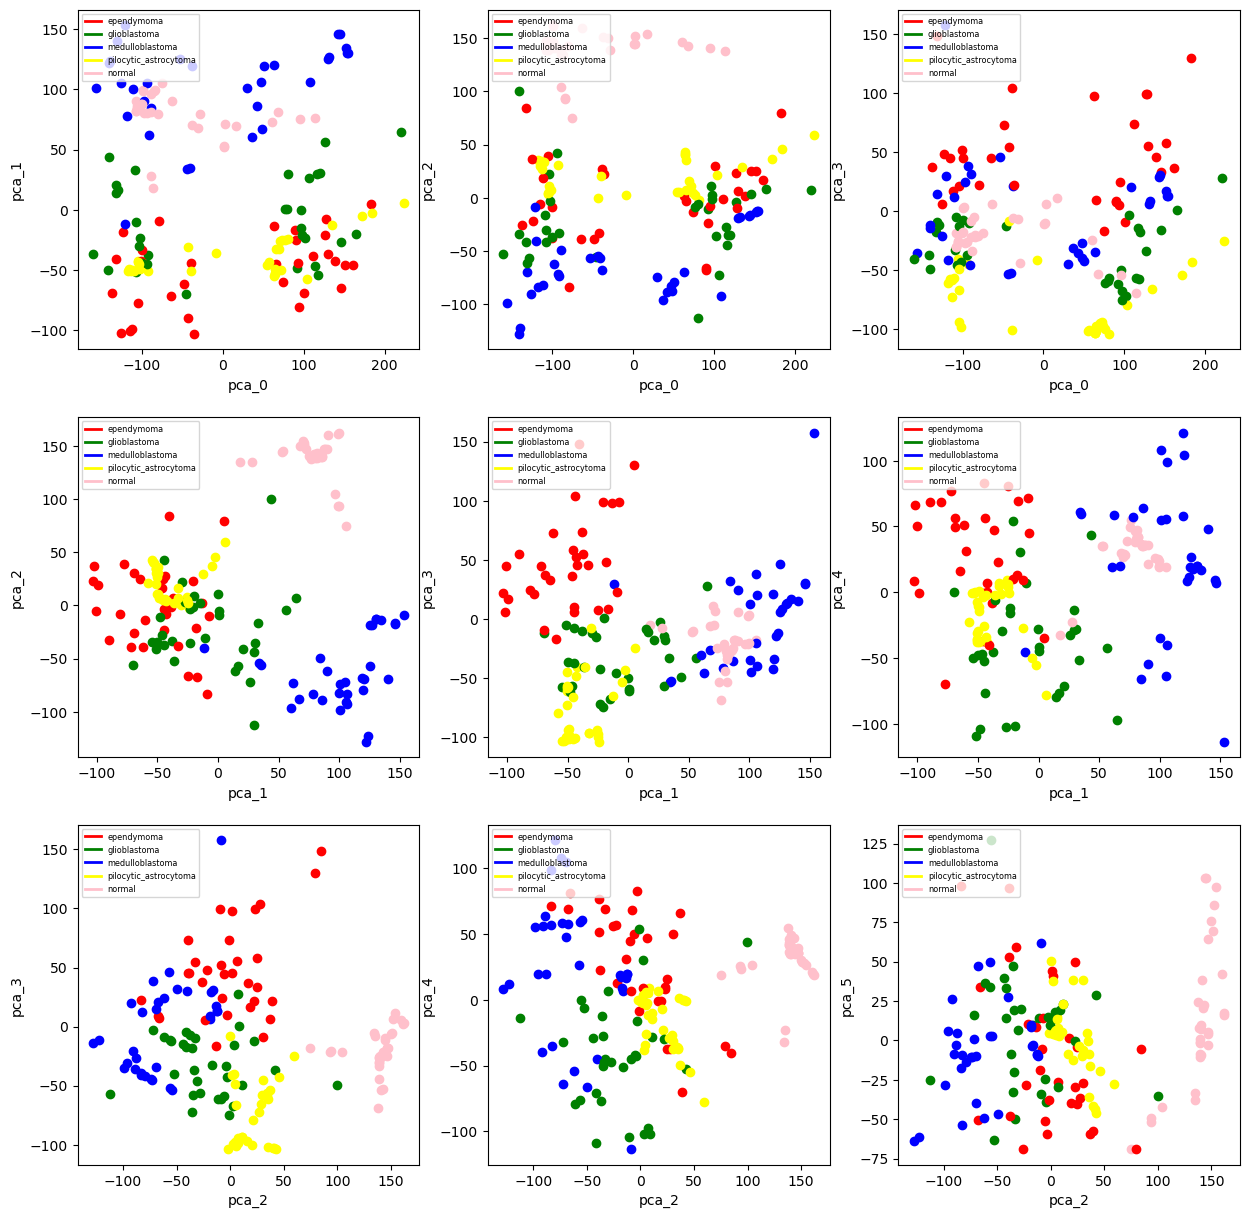

In [82]:

#import utils.helper as helper

print_classes(3,3,y_train_smote,df_pca)

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:

model = GaussianNB()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_pca)
print(accuracy_score(y_predict,y_test))

0.7692307692307693


In [85]:
pd.crosstab(y_test,y_predict)

col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,9,3,1,0,1
glioblastoma,0,9,1,0,0
medulloblastoma,0,0,7,0,0
normal,1,1,0,2,0
pilocytic_astrocytoma,0,1,0,0,3


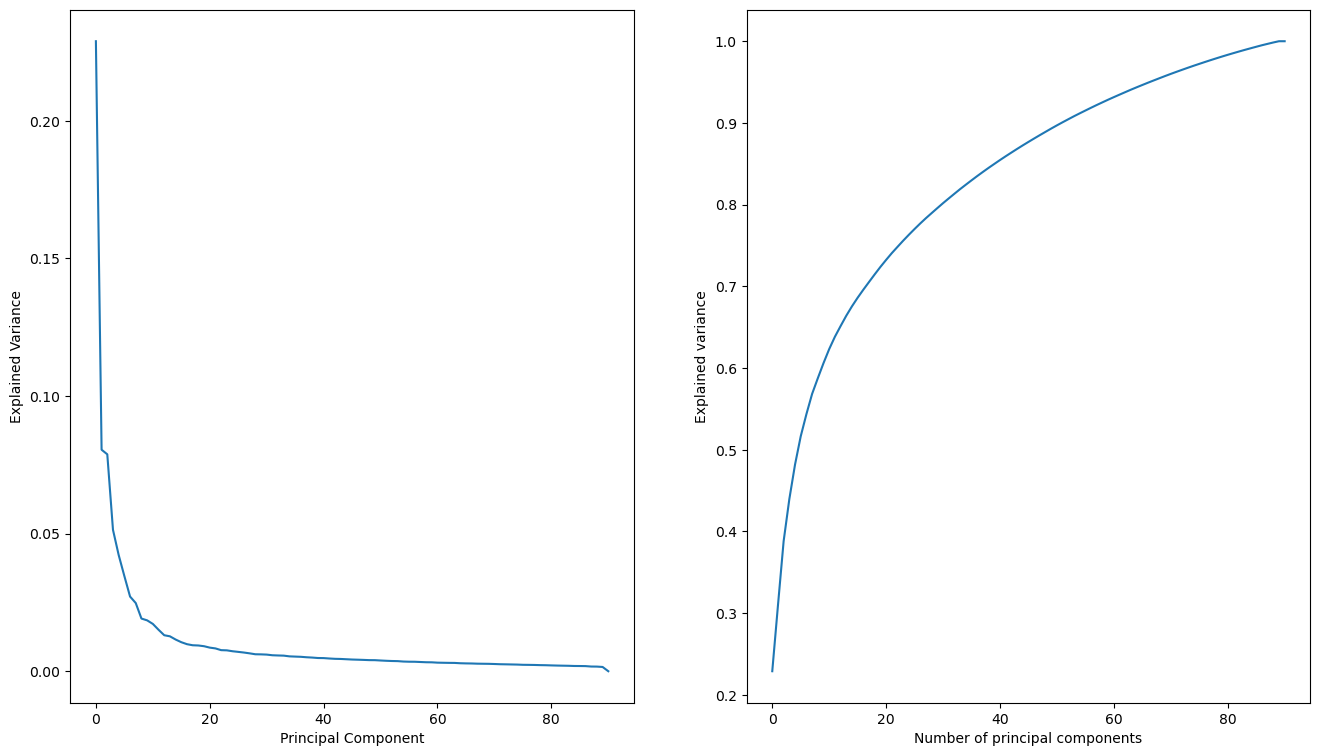

In [86]:
X_train, X_test, y_train, y_test, pca_names,df = load_preprocess_data('../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv',
                                                                    ['samples','type'], 'type')

In [87]:
X_test.shape

(39, 91)

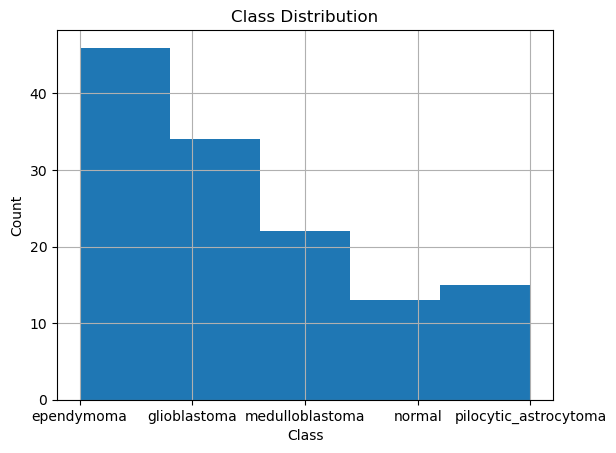

In [88]:
plot_class_distribution(df,'type')